# LOAD DATA (RAW )

In [10]:
import pandas as pd
import seaborn as sns
data = pd.read_csv('drugCom_raw.csv')


# Check shape, columns, data types

In [6]:
print('shape of the data ')
print(data.shape)
print('-------------------------------------')

shape of the data 
(215063, 8)
-------------------------------------


In [7]:
print('data info')
print(data.info())
print('-------------------------------------')

data info
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215063 entries, 0 to 215062
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   Unnamed: 0   215063 non-null  int64 
 1   uniqueID     215063 non-null  int64 
 2   drugName     215063 non-null  object
 3   condition    213869 non-null  object
 4   review       215063 non-null  object
 5   rating       215063 non-null  int64 
 6   date         215063 non-null  object
 7   usefulCount  215063 non-null  int64 
dtypes: int64(4), object(4)
memory usage: 13.1+ MB
None
-------------------------------------


In [8]:
print('describe data')
print(data.describe())
print('-------------------------------------')

describe data
          Unnamed: 0       uniqueID         rating    usefulCount
count  215063.000000  215063.000000  215063.000000  215063.000000
mean   107531.000000  116039.364814       6.990008      28.001004
std     62083.484809   67007.913366       3.275554      36.346069
min         0.000000       0.000000       1.000000       0.000000
25%     53765.500000   58115.500000       5.000000       6.000000
50%    107531.000000  115867.000000       8.000000      16.000000
75%    161296.500000  173963.500000      10.000000      36.000000
max    215062.000000  232291.000000      10.000000    1291.000000
-------------------------------------


# Find and visualize missing data

In [9]:
print('total null per colums')
print(data.isnull().sum())
print('-------------------------------------------------------------')

total null per colums
Unnamed: 0        0
uniqueID          0
drugName          0
condition      1194
review            0
rating            0
date              0
usefulCount       0
dtype: int64
-------------------------------------------------------------


visualize


<Axes: >

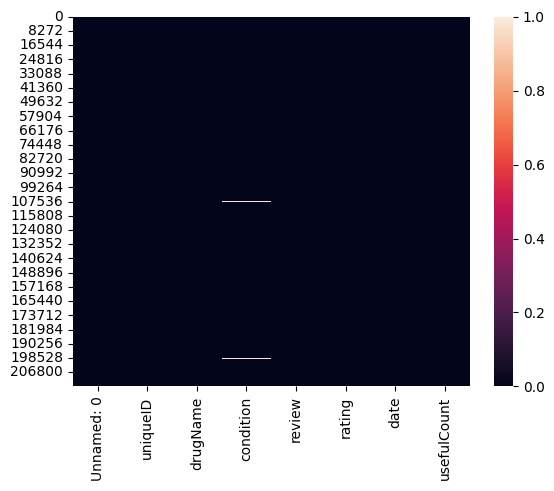

In [11]:
print('visualize')
sns.heatmap(data.isnull())

# Rating distribution

rating
10    68005
9     36708
1     28918
8     25046
7     12547
5     10723
2      9265
3      8718
6      8462
4      6671
Name: count, dtype: int64

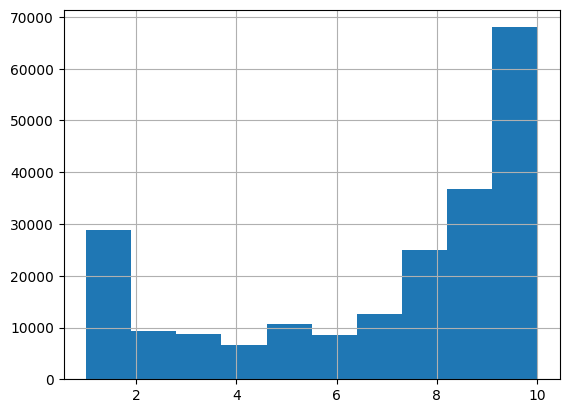

In [12]:
data['rating'].hist()
data['rating'].value_counts()

# Drug and condition frequencies

In [14]:
print(data['drugName'].value_counts().head(10))
print('---------------------')
print(data['condition'].value_counts().head(10))
print('---------------------')

drugName
Levonorgestrel                        4930
Etonogestrel                          4421
Ethinyl estradiol / norethindrone     3753
Nexplanon                             2892
Ethinyl estradiol / norgestimate      2790
Ethinyl estradiol / levonorgestrel    2503
Phentermine                           2085
Sertraline                            1868
Escitalopram                          1747
Mirena                                1673
Name: count, dtype: int64
---------------------
condition
Birth Control      38436
Depression         12164
Pain                8245
Anxiety             7812
Acne                7435
Bipolar Disorde     5604
Insomnia            4904
Weight Loss         4857
Obesity             4757
ADHD                4509
Name: count, dtype: int64
---------------------


# Review length analysis

In [22]:
data['review_length'] = data['review'].str.len()
print(data['review_length'].describe())

count    215063.000000
mean        458.620748
std         240.995226
min           3.000000
25%         262.000000
50%         456.000000
75%         690.000000
max       10787.000000
Name: review_length, dtype: float64


# Visualizations

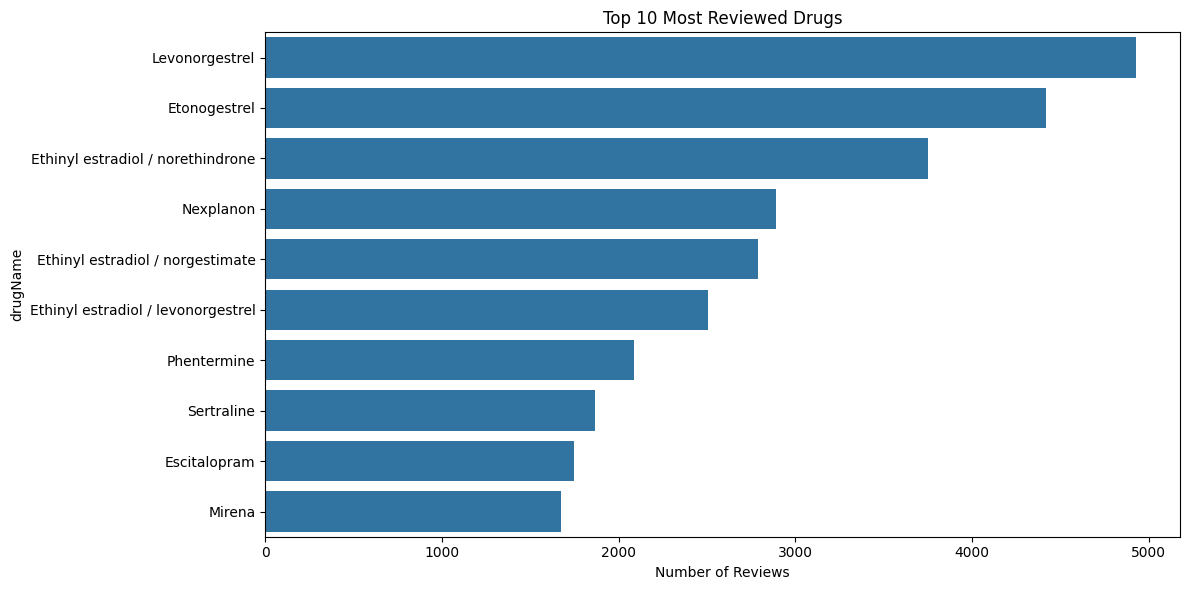

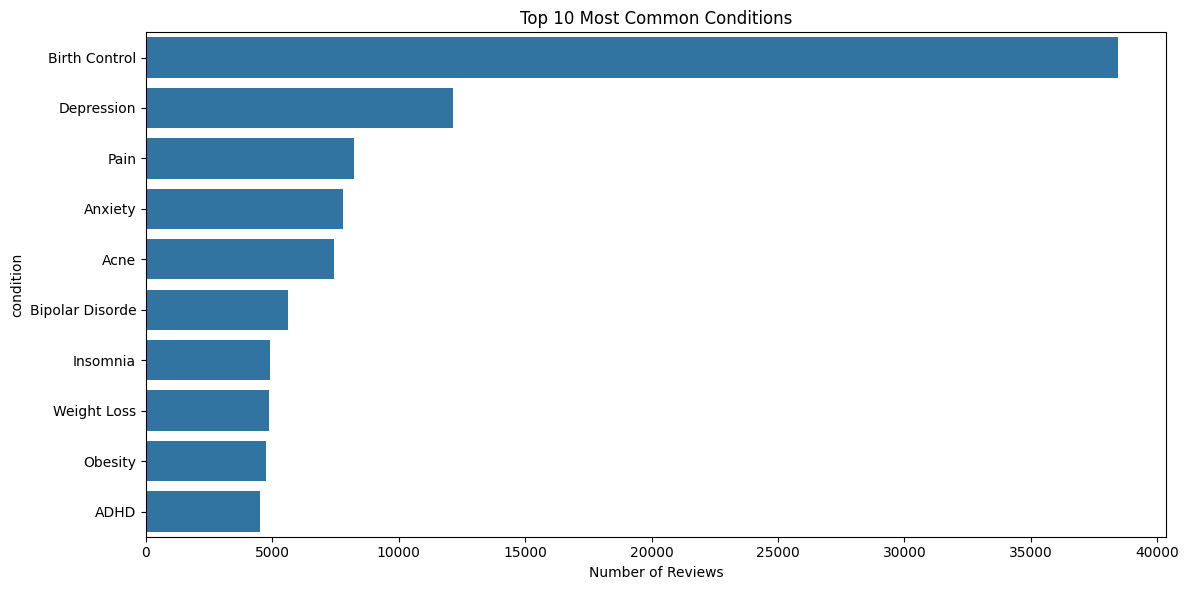

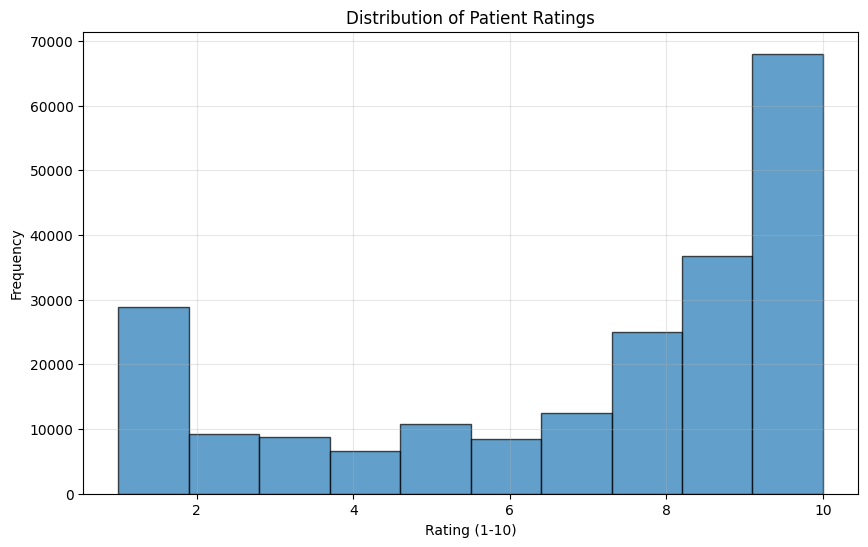

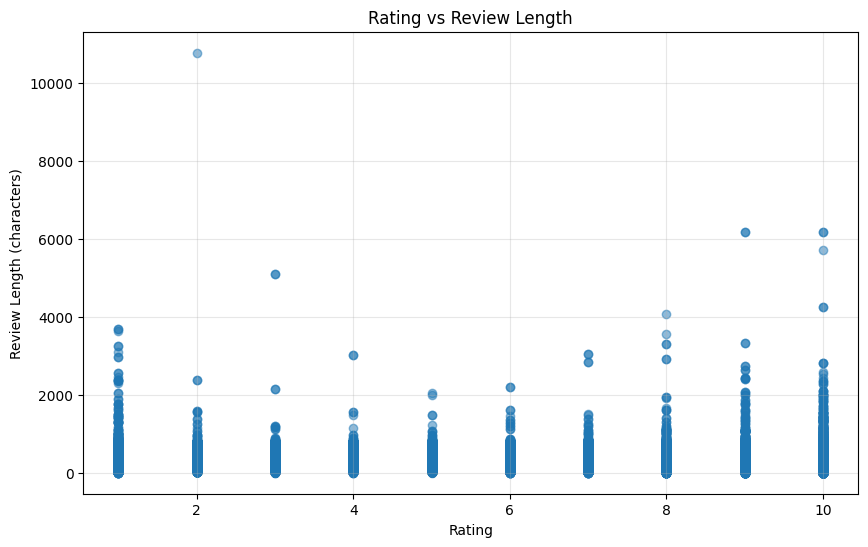

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Bar chart: Top 10 drugs
plt.figure(figsize=(12, 6))
top_drugs = data['drugName'].value_counts().head(10)
sns.barplot(x=top_drugs.values, y=top_drugs.index)
plt.title('Top 10 Most Reviewed Drugs')
plt.xlabel('Number of Reviews')
plt.tight_layout()
plt.show()

# 2. Bar chart: Top 10 conditions  
plt.figure(figsize=(12, 6))
top_conditions = data['condition'].value_counts().head(10)
sns.barplot(x=top_conditions.values, y=top_conditions.index)
plt.title('Top 10 Most Common Conditions')
plt.xlabel('Number of Reviews')
plt.tight_layout()
plt.show()

# 3. Histogram: Rating distribution
plt.figure(figsize=(10, 6))
data['rating'].hist(bins=10, edgecolor='black', alpha=0.7)
plt.title('Distribution of Patient Ratings')
plt.xlabel('Rating (1-10)')
plt.ylabel('Frequency')
plt.grid(True, alpha=0.3)
plt.show()

# 4. Scatter plot: Rating vs review length
plt.figure(figsize=(10, 6))
plt.scatter(data['rating'], data['review_length'], alpha=0.5)
plt.title('Rating vs Review Length')
plt.xlabel('Rating')
plt.ylabel('Review Length (characters)')
plt.grid(True, alpha=0.3)
plt.show()

# drop null data 

as there is only missing value in 'conditions' , which is also less than 1% , so we are droping  rows that containing nul values .

In [26]:
data= data.dropna(subset=['condition'])

In [27]:
data.shape

(213869, 9)

In [28]:
data.to_csv('cleaned_drugCom_raw.csv' , index=False , header=True)